In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [67]:
# Load dataset
file_path = "./heart_disease_uci.csv"
data = pd.read_csv(file_path)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [68]:
print(data.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [69]:
# Convert categorical variables into indicator variables, using one-hot encoding.
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang', 'fbs']
data_converted = pd.get_dummies(data, columns=categorical_columns, drop_first=True).drop('dataset', axis=1)
data_converted.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,exang_True,fbs_True
0,1,63,145.0,233.0,150.0,2.3,0.0,0,True,False,False,True,False,False,False,False,False,False,False,True
1,2,67,160.0,286.0,108.0,1.5,3.0,2,True,False,False,False,False,False,True,False,True,False,True,False
2,3,67,120.0,229.0,129.0,2.6,2.0,1,True,False,False,False,False,False,True,False,False,True,True,False
3,4,37,130.0,250.0,187.0,3.5,0.0,0,True,False,True,False,True,False,False,False,True,False,False,False
4,5,41,130.0,204.0,172.0,1.4,0.0,0,False,True,False,False,False,False,False,True,True,False,False,False


In [70]:
# Create new column, where 1 indicates heart disease, 0 indicates no heart disease. 
data_converted['target'] = data_converted['num'].apply(lambda x: 1 if x >0 else 0)

# Drop the original 'num' column as it's no longer needed
data_converted = data_converted.drop('num', axis=1)

# Handle missing values by imputing with the mean
data_converted.fillna(data_converted.mean(), inplace=True)

# Split the data into training and test. 
X = data_converted.drop('target', axis = 1)
y = data_converted['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Fit a logistic regression to the training data.
model = LogisticRegression(max_iter = 100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [76]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8369565217391305
Precision: 0.8691588785046729
Recall: 0.8532110091743119
ROC-AUC: 0.8332721712538227


### Confusion Matrix
The confusion matrix provdies a summary of the prediction results. 

We can see the distribution of true positives, true negatives, false positives, and false negatives. 

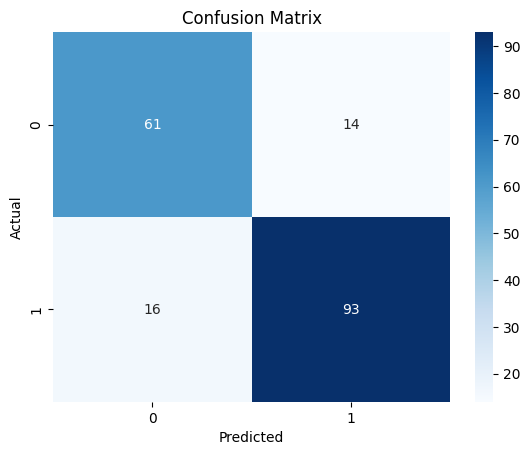

In [77]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Importance
The feature importance chart displays the coefficients of our logistic regression model.

We can see that sex is the most important predictor. We can infer that Male patients have a higher chance of heart disease. 

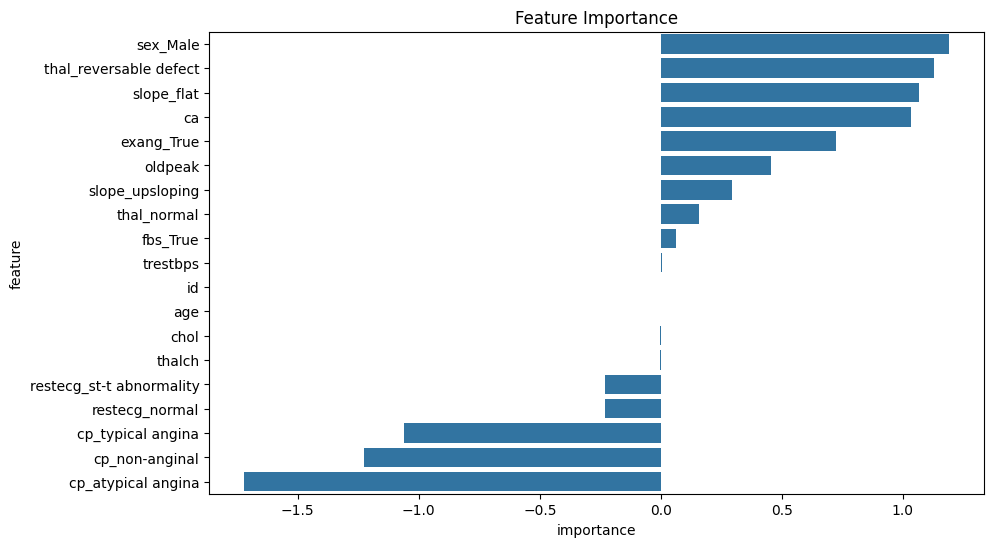

In [79]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()